In [65]:
import camelot
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
pdf = camelot.read_pdf('./SampleTable.pdf', pages='1,2', flavor='lattice')
pdf

<TableList n=4>

In [6]:
for table in pdf:
    print(table)

<Table shape=(4, 3)>
<Table shape=(15, 3)>
<Table shape=(14, 4)>
<Table shape=(13, 3)>


In [11]:
pdf[2].df

,0,1,2,3
0,Human Development Indicators,,2000,2011
1,13,Human Development Index Value (HDI),0.461,0.547
2,14,HDI Rank (out of 187),,134
3,15,Inequality Adjusted Human Development Index Value,,0.392
4,16,Loss in HDI due to Inequalities (%),,28.7
5,,,2001,2011
6,17,Gender Inequality Index (GII),0.5531,0.617
7,18,GII Rank (out of 146),,129
8,,,1996,2006
9,19,Gender Empowerment Measure (GEM),0.416,0.497


In [49]:
df = pdf[2].df.loc[11:, 1:].reset_index(drop=True)
df

,1,2,3
0,Literacy Rate (%),64.8,74.04
1,Male Literacy Rate (%),75.3,82.14
2,Female Literacy Rate (%),53.7,65.46


In [50]:
df.columns = ['Metrics', '2001', '2011']
df

,Metrics,2001,2011
0,Literacy Rate (%),64.8,74.04
1,Male Literacy Rate (%),75.3,82.14
2,Female Literacy Rate (%),53.7,65.46


In [24]:
import pandas as pd
import numpy as np

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Metrics  3 non-null      object
 1   2001     3 non-null      object
 2   2011     3 non-null      object
dtypes: object(3)
memory usage: 200.0+ bytes


In [53]:
df.loc[:, ['2001', '2011']] = df.loc[:, ['2001', '2011']].astype(np.float32)
df

,Metrics,2001,2011
0,Literacy Rate (%),64.800003,74.040001
1,Male Literacy Rate (%),75.300003,82.139999
2,Female Literacy Rate (%),53.700001,65.459999


In [54]:
df.to_csv('SampleTable.csv', index=False)

In [55]:
df = pd.read_csv('./SampleTable.csv')
df

,Metrics,2001,2011
0,Literacy Rate (%),64.800003,74.040001
1,Male Literacy Rate (%),75.300003,82.139999
2,Female Literacy Rate (%),53.700001,65.459999


In [62]:
df_melted = df.melt('Metrics', var_name='year', value_name='percentage')
df_melted

,Metrics,year,percentage
0,Literacy Rate (%),2001,64.800003
1,Male Literacy Rate (%),2001,75.300003
2,Female Literacy Rate (%),2001,53.700001
3,Literacy Rate (%),2011,74.040001
4,Male Literacy Rate (%),2011,82.139999
5,Female Literacy Rate (%),2011,65.459999


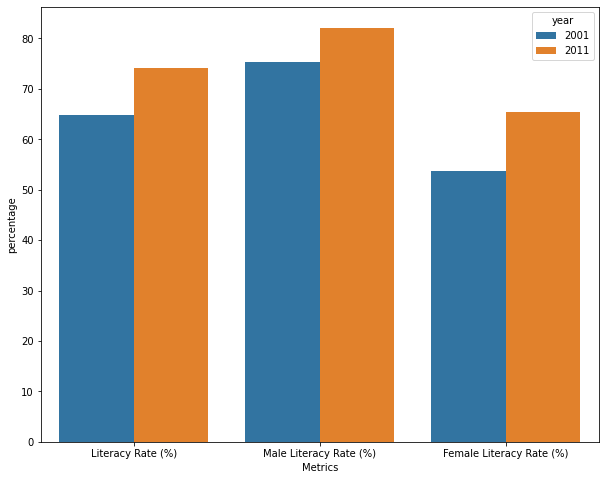

In [68]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Metrics', y='percentage', hue='year', data=df_melted);